In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd

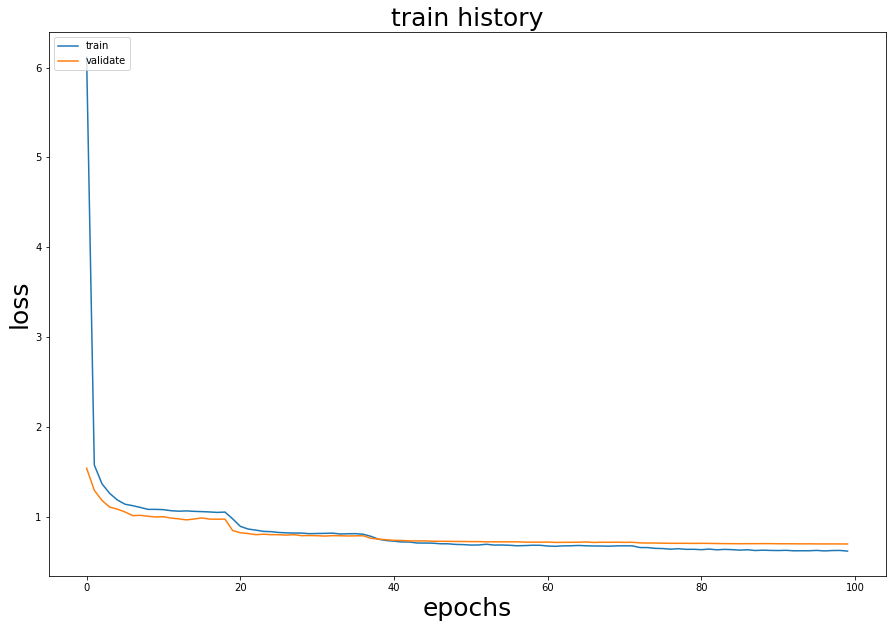

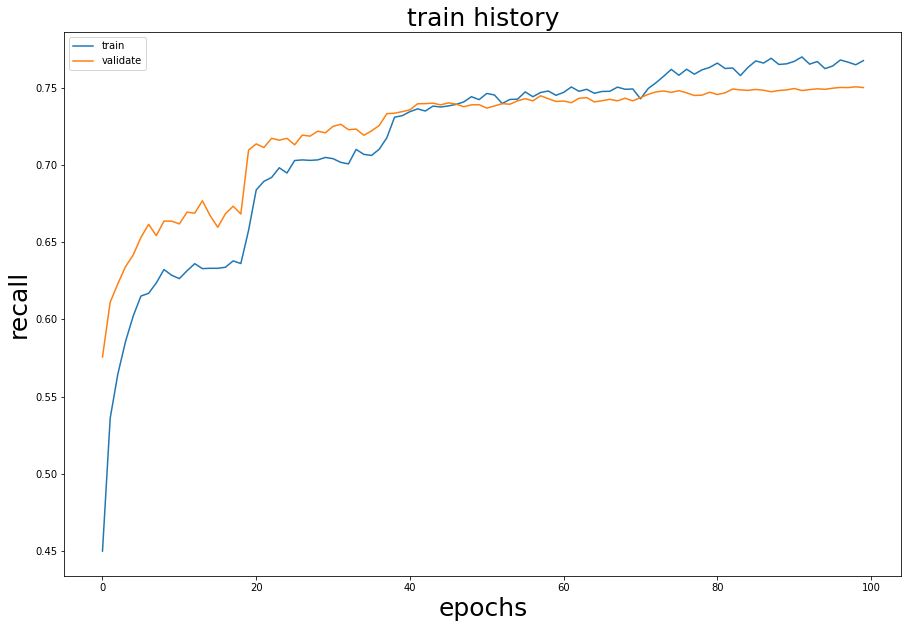

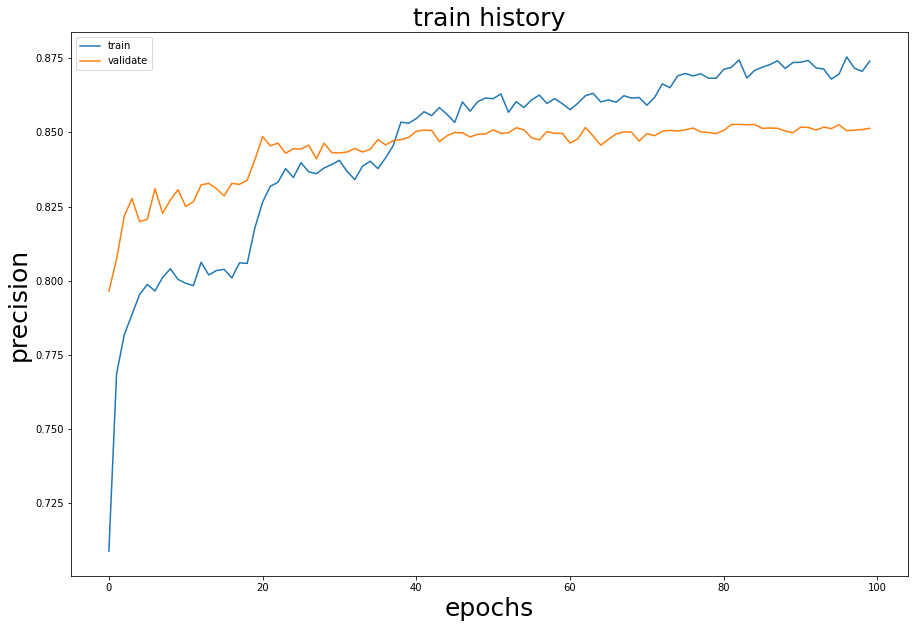

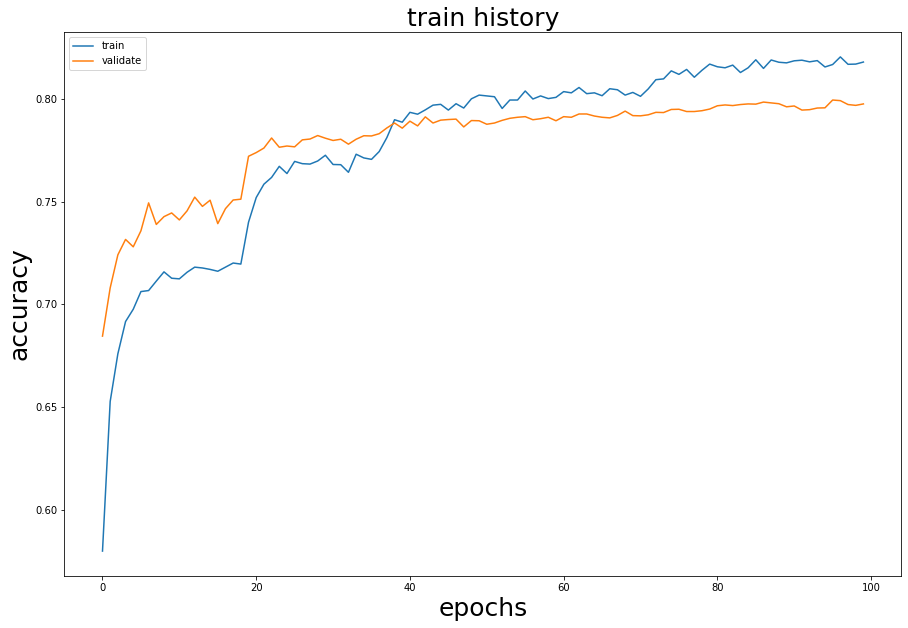

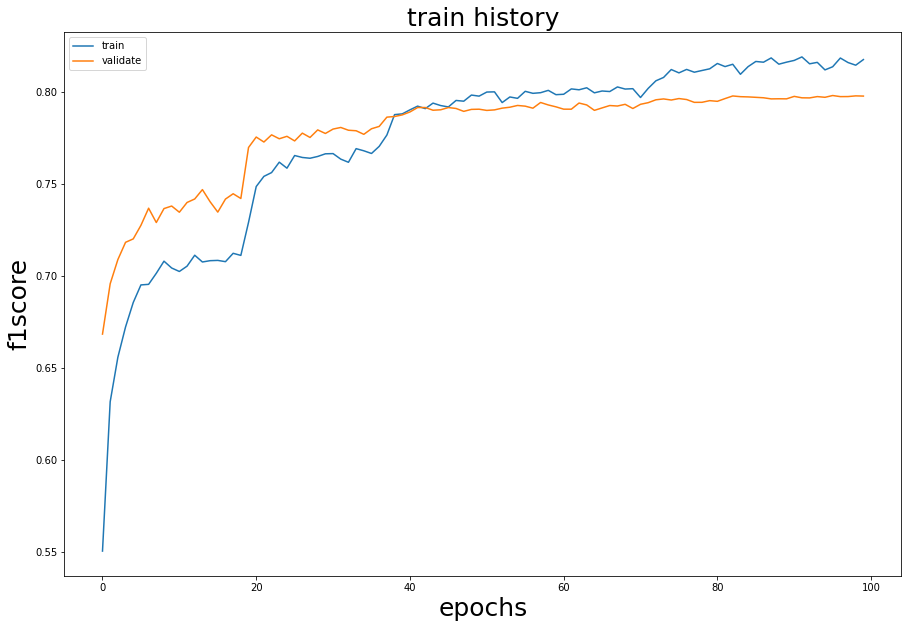

In [37]:
import matplotlib.pyplot as plot  # plot 可以視為畫布
dfh=pd.read_csv(r'D:\_YUN\24_ML\Work02\CIFAR10\Model\C10_VGG16_01_history.csv')
dfh['f1score']= 2 * (dfh['precision'] * dfh['recall']) / (dfh['precision'] + dfh['recall'])
dfh['val_f1score']= 2 * (dfh['val_precision'] * dfh['val_recall']) / (dfh['val_precision'] + dfh['val_recall'])
def train_history_graphic( history       # 資料集合
                         , history_key1  # 資料集合裡面的來源 1 (有 loss, acc, val_loss, val_acc 四種)
                         , history_key2  # 資料集合裡面的來源 2 (有 loss, acc, val_loss, val_acc 四種)
                         , y_label       # Y 軸標籤文字
                         , index=0
                         ) :
    plot.figure(figsize=(15,10))
    font_size=25
    # 資料來源 1
    plot.plot( history[history_key1][index:] )
    # 資料來源 2
    plot.plot( history[history_key2][index:] )
    # 標題
    plot.title( 'train history',fontsize=font_size )
    # X 軸標籤文字
    plot.xlabel( 'epochs',fontsize=font_size )
    # Y 軸標籤文字
    plot.ylabel( y_label,fontsize=font_size )
    # 設定圖例
    # (參數 1 為圖例說明, 有幾個資料來源, 就對應幾個圖例說明)
    # (參數 2 為圖例位置, upper 為上面, lower 為下面, left 為左邊, right 為右邊)
    plot.legend( ['train', 'validate']
               , loc = 'upper left'
               )
    # 顯示畫布
    plot.show()
# 

#############################################
metrics_list=['loss','recall','precision','accuracy','f1score']
for metrics in metrics_list :
  train_history_graphic( dfh, metrics, f'val_{metrics}', metrics, 0 )


In [3]:
from tensorflow.keras import layers
test_dir=r'D:\_YUN\24_ML\Work02\CIFAR10\test'
test_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(32, 32),
    shuffle=True,
    interpolation="bilinear"
)
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), tf.cast(y, dtype=tf.int32)))

Found 10000 files belonging to 10 classes.


In [5]:
vgg1=tf.keras.models.load_model(r'D:\_YUN\24_ML\Work02\CIFAR10\Model\C10_VGG16_01')

loss ： 0.71518
precision：0.84569
recall：0.74700
accuracy： 0.79110
f1score：0.79329

In [15]:
def evaluate_model_1(model,test_dataset):
    precision=tf.keras.metrics.Precision(name='precision')
    recall=tf.keras.metrics.Recall(name='recall')
    accuracy=tf.keras.metrics.CategoricalAccuracy(name='accuracy')
    model.compile(optimizer='Adam',
    loss='categorical_crossentropy',
    metrics = [precision,recall,accuracy]
      )
    preds=model.evaluate(test_dataset)
    print(model)
    print('loss ： %.5f' % preds[0])
    print('precision：%.5f' % preds[1])
    print('recall：%.5f' % preds[2])
    print('accuracy： %.5f' %preds[3])
    F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
    print('f1score：%.5f' % F1)
    print("===========================================")
    preds.append(F1)
    return  pd.DataFrame([preds],columns=['loss','precision','recall','accuracy','f1score'])
df=evaluate_model_1(vgg1,test_dataset)
df

157/157 [==============================] - 29s 179ms/step - loss: 0.7130 - precision: 0.8450 - recall: 0.7427 - accuracy: 0.7868
loss ： 0.71518
precision：0.84569
recall：0.74700
accuracy： 0.79110
f1score：0.79329
[0.7151827812194824, 0.8456922769546509, 0.746999979019165, 0.791100025177002, 0.7932883590942503]


,loss,precision,recall,accuracy,f1score
0,0.715183,0.845692,0.747,0.7911,0.793288
